In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/archive.zip"

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2,os

data_path="/content/data"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)



{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [ ]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
          gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
          resized=cv2.resize(gray,(img_size,img_size))
          #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
          data.append(resized)
          target.append(label_dict[category])
          #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
          print('Exception:',e)
          #if any exception rasied, the exception will be printed here. And pass to the next image





face mask detection 2.0

In [ ]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [ ]:
np.save('data',data)
np.save('target',new_target)

In [ ]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:

from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
!pip install tensorflowjs

In [ ]:
import tensorflowjs as tfjs

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=15,callbacks=[checkpoint],validation_split=0.3)
model.save("drive/MyDrive/")

Epoch 1/15
149/149 [==============================] - 368s 2s/step - loss: 0.0900 - accuracy: 0.9647 - val_loss: 0.3232 - val_accuracy: 0.8882
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/15
149/149 [==============================] - 369s 2s/step - loss: 0.0679 - accuracy: 0.9748 - val_loss: 0.3390 - val_accuracy: 0.8868
Epoch 3/15
149/149 [==============================] - 370s 2s/step - loss: 0.0637 - accuracy: 0.9767 - val_loss: 0.3410 - val_accuracy: 0.8941
Epoch 4/15
149/149 [==============================] - 369s 2s/step - loss: 0.0603 - accuracy: 0.9809 - val_loss: 0.3489 - val_accuracy: 0.8882
Epoch 5/15
149/149 [==============================] - 368s 2s/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.4198 - val_accuracy: 0.8917
Epoch 6/15
149/149 [==============================] - 368s 2s/step - loss: 0.0479 - accuracy: 0.9830 - val_loss: 0.4068 - val_accuracy: 0.8843
Epoch 7/15
149/149 [==============================] - 368s 2s/step - loss: 0.0435 - 

In [ ]:
!cp -r model-007.model drive/MyDrive/

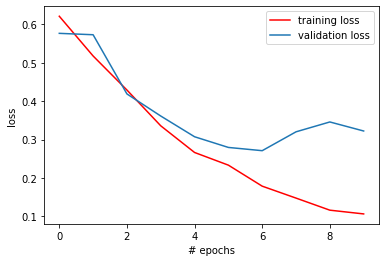

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

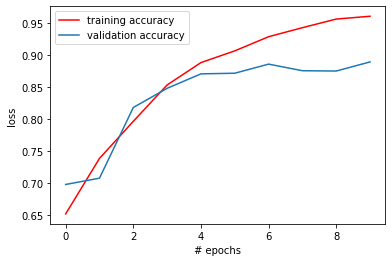

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('model-007.model') 
print(loaded_model.evaluate(test_data,test_target))

24/24 [==============================] - 15s 609ms/step - loss: 0.3193 - accuracy: 0.8743
[0.31926229596138, 0.8743386268615723]


face mask detection 3.0

In [ ]:
from keras.models import load_model
import cv2
import numpy as np
import tensorflow as tf


In [ ]:
loaded_model = tf.keras.models.load_model('model-012.model')
tf.keras.models.save_model(loaded_model,"drive/MyDrive/model_02.h5")


In [ ]:
!cp -r /content/models drive/MyDrive/models_Noor

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model("model-015.model")
tfmodel = converter.convert()
open ("model.tflite" , "wb").write(tfmodel)

11311712

In [ ]:
!cp -r model.tflite drive/MyDrive

In [ ]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()
